In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [4]:
df = pd.read_csv("Preprocessed.csv")
df

CustomerID  Customer_Lifetime_Value  Coverage             Education  \
0           5917              7824.372789     Basic              Bachelor   
1           2057              8005.964669     Basic               College   
2           4119              8646.504109     Basic  High School or Below   
3           1801              9294.088719     Basic               College   
4           9618              5595.971365     Basic              Bachelor   
...          ...                      ...       ...                   ...   
9801        3735             20496.694260     Basic  High School or Below   
9802        5988              2592.437797     Basic  High School or Below   
9803        8767              3103.923041  Extended               College   
9804        9900              9161.655119     Basic  High School or Below   
9805       11323              8583.272854   Premium  High School or Below   

     EmploymentStatus Gender   Income  Location_Geo Location_Code  \
0          Unemployed      F      0.0        177777         Urban   
1            Employed      M  63357.0        288766      Suburban   
2            Employed      F  64125.0        216884         Urban   
3            Employed      M  67544.0         19725      Suburban   
4             Retired      F  19651.0        191747      Suburban   
...               ...    ...      ...           ...           ...   
9801       Unemployed      F      0.0        127794      Suburban   
9802         Employed      M  72421.0        186723      Suburban   
9803         Employed      F  74665.0        192747         Urban   
9804         Employed      F  91763.0        195739         Urban   
9805         Disabled      F  18017.0        172782      Suburban   

     Marital_Status  ...  Months_Since_Policy_Inception  \
0           Married  ...                             33   
1           Married  ...                             42   
2           Married  ...                             44   
3           Married  ...                             15   
4           Married  ...                             68   
...             ...  ...                            ...   
9801         Single  ...                             72   
9802        Married  ...                             23   
9803        Married  ...                             90   
9804        Married  ...                             64   
9805       Divorced  ...                             54   

      Number_of_Open_Complaints  Number_of_Policies     Policy_Type  \
0                             0                   2   Personal Auto   
1                             0                   5   Personal Auto   
2                             0                   3   Personal Auto   
3                             0                   3  Corporate Auto   
4                             0                   5   Personal Auto   
...                         ...                 ...             ...   
9801                          0                   2   Personal Auto   
9802                          0                   1  Corporate Auto   
9803                          2                   1  Corporate Auto   
9804                          0                   3    Special Auto   
9805                          0                   9   Personal Auto   

            Policy Renew_Offer_Type Sales_Channel Total_Claim_Amount  \
0      Personal L2           Offer2        Branch         267.214383   
1      Personal L2           Offer2         Agent         565.508572   
2      Personal L1           Offer2        Branch         369.818708   
3     Corporate L3           Offer1        Branch         556.800000   
4      Personal L1           Offer2           Web         345.600000   
...            ...              ...           ...                ...   
9801   Personal L2           Offer1        Branch         307.200000   
9802  Corporate L3           Offer2   Call Center         312.000000   
9803  Corporate L2           Offer2   Call

## Grouped Cross Tabulation Analysis

In [6]:
def compute_Tabulation(x,y):
    val = pd.crosstab(x,y)
    return val

In [7]:
married = df[df['Marital_Status']=='Married']
class color:
   BOLD = '\033[1m'
   END = '\033[0m'
print(color.BOLD +'Tabulation of Only Married People'+ color.END)
compute_Tabulation(married['Policy_Type'],married['EmploymentStatus'])

Tabulation of Only Married People


EmploymentStatus  Disabled  Employed  Medical Leave  Retired  Unemployed
Policy_Type                                                             
Corporate Auto          51       838             53       16         147
Personal Auto          218      3192            276      108         641
Special Auto            13       171             13        3          32

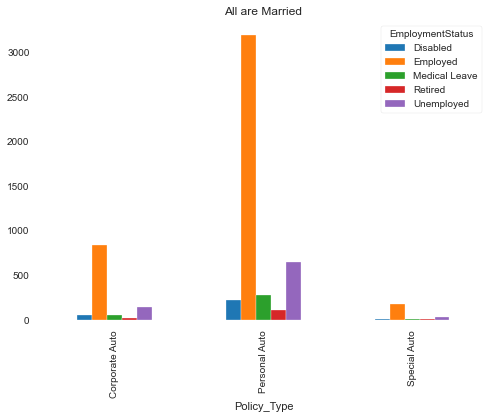

In [8]:
compute_Tabulation(married['Policy_Type'],married['EmploymentStatus']).plot(title='All are Married',kind='bar')

In [9]:
married = df[df['Marital_Status']=='Single']
# class color:
#    BOLD = '\033[1m'
#    END = '\033[0m'
print(color.BOLD +'Tabulation of Only Single People'+ color.END)
compute_Tabulation(married['Policy_Type'],married['EmploymentStatus'])

Tabulation of Only Single People


EmploymentStatus  Disabled  Employed  Medical Leave  Retired  Unemployed
Policy_Type                                                             
Corporate Auto          10       193             17       13         278
Personal Auto           45       759             62       37        1086
Special Auto             2        44              2        0          53

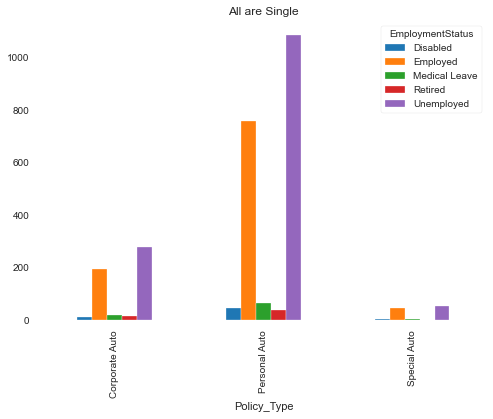

In [10]:
compute_Tabulation(married['Policy_Type'],married['EmploymentStatus']).plot(title='All are Single',kind='bar')

In [11]:
married = df[df['Marital_Status']=='Married']
male = married[married['Gender']=='M']
# class color:
#    BOLD = '\033[1m'
#    END = '\033[0m'
print(color.BOLD +'Tabulation of Only Married Male People'+ color.END)
compute_Tabulation(male['Policy_Type'],male['EmploymentStatus'])

Tabulation of Only Married Male People


EmploymentStatus  Disabled  Employed  Medical Leave  Retired  Unemployed
Policy_Type                                                             
Corporate Auto          21       407             28       10          73
Personal Auto           89      1435            132       65         289
Special Auto             6        75              9        1          16

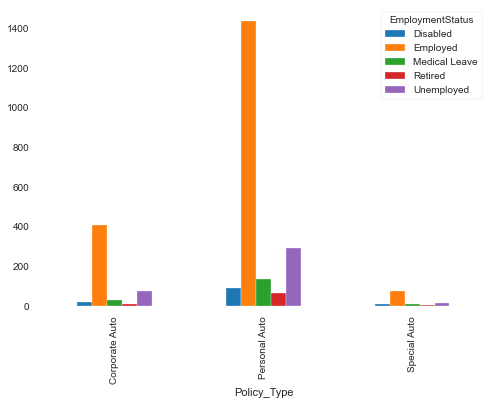

In [12]:
compute_Tabulation(male['Policy_Type'],male['EmploymentStatus']).plot(kind='bar')

In [13]:
married = df[df['Marital_Status']=='Married']
female = married[married['Gender']=='F']
# class color:
#    BOLD = '\033[1m'
#    END = '\033[0m'
print(color.BOLD +'Tabulation of Only Married Female People'+ color.END)
compute_Tabulation(female['Policy_Type'],female['EmploymentStatus'])

Tabulation of Only Married Female People


EmploymentStatus  Disabled  Employed  Medical Leave  Retired  Unemployed
Policy_Type                                                             
Corporate Auto          30       431             25        6          74
Personal Auto          129      1757            144       43         352
Special Auto             7        96              4        2          16

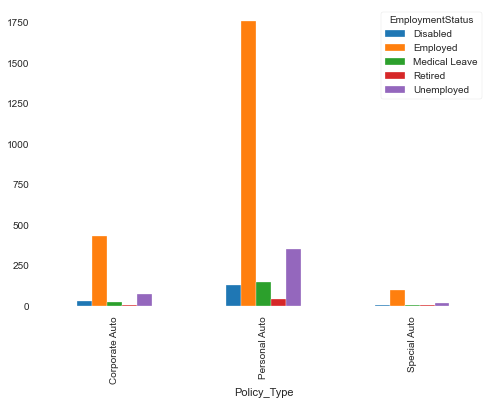

In [14]:
compute_Tabulation(female['Policy_Type'],female['EmploymentStatus']).plot(kind='bar')

In [15]:
Employed = df[df['EmploymentStatus']=='Employed']
# class color:
#    BOLD = '\033[1m'
#    END = '\033[0m'
print(color.BOLD +'Tabulation of Only Employed People'+ color.END)
compute_Tabulation(Employed['Policy_Type'],Employed['Marital_Status'])

Tabulation of Only Employed People


Marital_Status  Divorced  Married  Single
Policy_Type                              
Corporate Auto       205      838     193
Personal Auto        718     3192     759
Special Auto          18      171      44

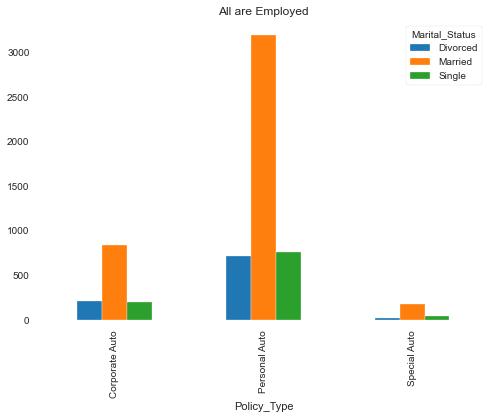

In [16]:
compute_Tabulation(Employed['Policy_Type'],Employed['Marital_Status']).plot(title='All are Employed',kind='bar')

In [17]:
UnEmployed = df[df['EmploymentStatus']=='Unemployed']
# class color:
#    BOLD = '\033[1m'
#    END = '\033[0m'
print(color.BOLD +'Tabulation of Only UnEmployed People'+ color.END)
compute_Tabulation(UnEmployed['Policy_Type'],UnEmployed['Marital_Status'])

Tabulation of Only UnEmployed People


Marital_Status  Divorced  Married  Single
Policy_Type                              
Corporate Auto        50      147     278
Personal Auto        165      641    1086
Special Auto           9       32      53

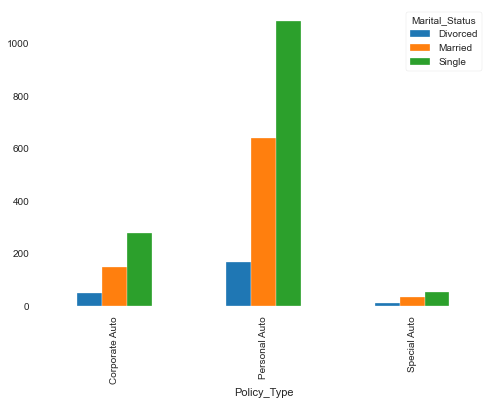

In [18]:
compute_Tabulation(UnEmployed['Policy_Type'],UnEmployed['Marital_Status']).plot(kind= 'bar')

In [19]:
Employed = df[df['EmploymentStatus']=='Employed']
Employed_Male = Employed[Employed['Gender']== 'M']
# class color:
#    BOLD = '\033[1m'
#    END = '\033[0m'
print(color.BOLD +'Tabulation of Only Employed Male People'+ color.END)
compute_Tabulation(Employed_Male['Policy_Type'],Employed_Male['Marital_Status'])

Tabulation of Only Employed Male People


Marital_Status  Divorced  Married  Single
Policy_Type                              
Corporate Auto       101      407      99
Personal Auto        360     1435     406
Special Auto           7       75      23

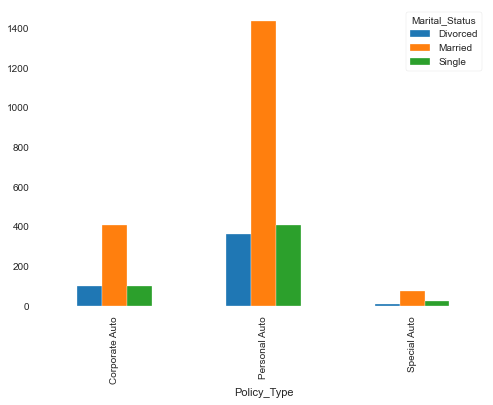

In [20]:
compute_Tabulation(Employed_Male['Policy_Type'],Employed_Male['Marital_Status']).plot(kind='bar')

In [21]:
Employed = df[df['EmploymentStatus']=='Employed']
Employed_FeMale = Employed[Employed['Gender']== 'F']
# class color:
#    BOLD = '\033[1m'
#    END = '\033[0m'
print(color.BOLD +'Tabulation of Only Employed Male People'+ color.END)
compute_Tabulation(Employed_FeMale['Policy_Type'],Employed_FeMale['Marital_Status'])

Tabulation of Only Employed Male People


Marital_Status  Divorced  Married  Single
Policy_Type                              
Corporate Auto       104      431      94
Personal Auto        358     1757     353
Special Auto          11       96      21

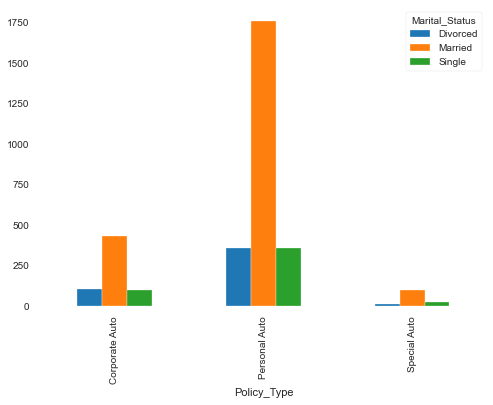

In [22]:
compute_Tabulation(Employed_FeMale['Policy_Type'],Employed_FeMale['Marital_Status']).plot(kind='bar')

In [23]:
UnEmployed = df[df['EmploymentStatus']=='Unemployed']
UnEmployed_Male = UnEmployed[UnEmployed['Gender']== 'M']
# class color:
#    BOLD = '\033[1m'
#    END = '\033[0m'
print(color.BOLD +'Tabulation of Only UnEmployed Male People'+ color.END)
compute_Tabulation(UnEmployed_Male['Policy_Type'],UnEmployed_Male['Marital_Status'])

Tabulation of Only UnEmployed Male People


Marital_Status  Divorced  Married  Single
Policy_Type                              
Corporate Auto        22       73     141
Personal Auto         75      289     549
Special Auto           3       16      23

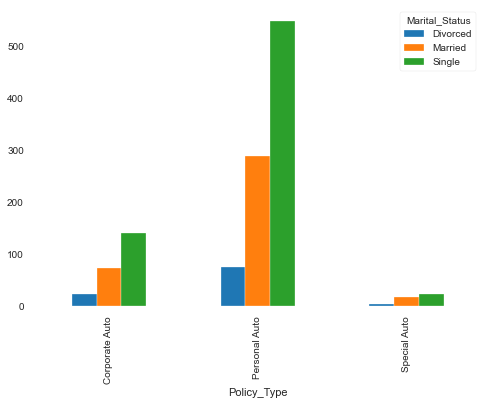

In [24]:
compute_Tabulation(UnEmployed_Male['Policy_Type'],UnEmployed_Male['Marital_Status']).plot(kind='bar')

In [25]:
UnEmployed = df[df['EmploymentStatus']=='Unemployed']
UnEmployed_FeMale = UnEmployed[UnEmployed['Gender']== 'F']
# class color:
#    BOLD = '\033[1m'
#    END = '\033[0m'
print(color.BOLD +'Tabulation of Only UnEmployed FeMale People'+ color.END)
compute_Tabulation(UnEmployed_FeMale['Policy_Type'],UnEmployed_FeMale['Marital_Status'])

Tabulation of Only UnEmployed FeMale People


Marital_Status  Divorced  Married  Single
Policy_Type                              
Corporate Auto        28       74     137
Personal Auto         90      352     537
Special Auto           6       16      30

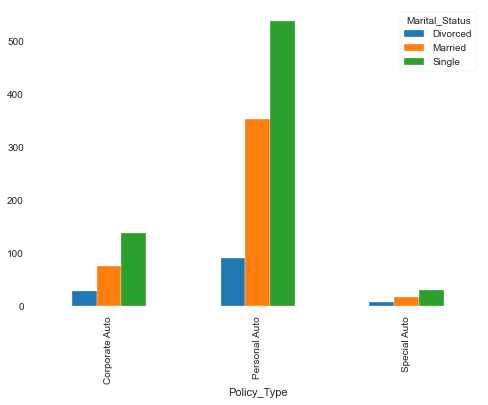

In [26]:
compute_Tabulation(UnEmployed_FeMale['Policy_Type'],UnEmployed_FeMale['Marital_Status']).plot(kind='bar')

In [27]:
import plotly.express as px
fig = px.histogram(df,y="Customer_Lifetime_Value", histnorm='probability density', color="Gender")
fig.show()

In [28]:
fig = px.histogram(df,y="Income", histnorm='probability density', color="Gender")
fig.show()

In [29]:
fig = px.histogram(df,y="Total_Claim_Amount", histnorm='probability density', color="Gender")
fig.show()

In [30]:
fig = px.histogram(df,y="Location_Geo", histnorm='probability density', color="Gender")
fig.show()

In [31]:
fig = px.histogram(df,x="Total_Claim_Amount",y='Education',histnorm='probability density', color="Gender")
fig.show()

In [32]:
fig = px.histogram(df,x="Total_Claim_Amount",y='Gender',histnorm='probability density', color="Education")
fig.show()

In [33]:
fig = px.histogram(df,x="Total_Claim_Amount",y='EmploymentStatus',histnorm='probability density', color="Gender")
fig.show()

In [34]:
fig = px.histogram(df,x="Total_Claim_Amount",y='Gender',histnorm='probability density', color="EmploymentStatus")
fig.show()

In [35]:
from scipy.stats import chi2_contingency,chi2

def Chi_Square_Test(x,y,confidence_interval):
    cross_table = pd.crosstab(x,y,margins=True)
    statistic_val,prob_val,dof,expected = chi2_contingency(cross_table)
    print("Chi_Square Value = {0}".format(statistic_val))
    print("P-Value = {0}".format(prob_val))
    alpha = 1 - confidence_interval
    
    if prob_val > alpha:
        print(">> Accepting Null Hypothesis <<")
        print(color.BOLD +"No Relationship"+ color.END)
    else:
        print(">> Rejecting Null Hypothesis <<")
        print(color.BOLD + "Significant Relationship" + color.END)

In [36]:
print("===================================================================")
print(color.BOLD +"1) Chi Square Test for  Education and Coverage"+ color.END)
print("===================================================================")
Chi_Square_Test(df['Education'],df['Coverage'],0.95)
print("===================================================================")
print(color.BOLD +"2) Chi Square Test for  Education and EmploymentStatus"+ color.END)
print("===================================================================")
Chi_Square_Test(df['Education'],df['EmploymentStatus'],0.95)
print("===================================================================")
print(color.BOLD +"3) Chi Square Test for  EmploymentStatus and Gender"+ color.END)
print("===================================================================")
Chi_Square_Test(df['EmploymentStatus'],df['Gender'],0.95)
print("===================================================================")
print(color.BOLD +"4) Chi Square Test for  Location_Code and Marital_Status"+ color.END)
print("===================================================================")
Chi_Square_Test(df['Location_Code'],df['Marital_Status'],0.95)
print("===================================================================")
print(color.BOLD +"5) Chi Square Test for  Policy_Type and Policy"+ color.END)
print("===================================================================")
Chi_Square_Test(df['Policy_Type'],df['Policy'],0.95)
print("===================================================================")
print(color.BOLD +"6) Chi Square Test for  Policy_Type and Renew_Offer_Type"+ color.END)
print("===================================================================")
Chi_Square_Test(df['Policy_Type'],df['Renew_Offer_Type'],0.95)
print("===================================================================")
print(color.BOLD +"7) Chi Square Test for  Vehicle_Class and Renew_Offer_Type"+ color.END)
print("===================================================================")
Chi_Square_Test(df['Vehicle_Class'],df['Renew_Offer_Type'],0.95)
print("===================================================================")
print(color.BOLD +"8) Chi Square Test for  Vehicle_Class and Policy_Type"+ color.END)
print("===================================================================")
Chi_Square_Test(df['Vehicle_Class'],df['Policy_Type'],0.95)
print("===================================================================")
print(color.BOLD +"9) Chi Square Test for  Policy_Type and EmploymentStatus"+ color.END)
print("===================================================================")
Chi_Square_Test(df['Policy_Type'],df['EmploymentStatus'],0.95)
print("===================================================================")
print(color.BOLD +"10) Chi Square Test for  Vehicle_Class and Coverage"+ color.END)
print("===================================================================")
Chi_Square_Test(df['Vehicle_Class'],df['Coverage'],0.95)
print("===================================================================")
print(color.BOLD +"11) Chi Square Test for  Policy_Type and Coverage"+ color.END)
print("===================================================================")
Chi_Square_Test(df['Policy_Type'],df['Coverage'],0.95)
print("===================================================================")
print(color.BOLD +"12) Chi Square Test for  Education and Renew_Offer_Type"+ color.END)
print("===================================================================")
Chi_Square_Test(df['Education'],df['Renew_Offer_Type'],0.95)

1) Chi Square Test for  Education and Coverage
Chi_Square Value = 15.898080596823338
P-Value = 0.3888574807147065
>> Accepting Null Hypothesis <<
No Relationship
2) Chi Square Test for  Education and EmploymentStatus
Chi_Square Value = 160.81521364402602
P-Value = 8.320060475235969e-22
>> Rejecting Null Hypothesis <<
Significant Relationship
3) Chi Square Test for  EmploymentStatus and Gender
Chi_Square Value = 19.430740092782983
P-Value = 0.035120659546621275
>> Rejecting Null Hypothesis <<
Significant Relationship
4) Chi Square Test for  Location_Code and Marital_Status
Chi_Square Value = 385.7149563167677
P-Value = 1.5263599516375555e-77
>> Rejecting Null Hypothesis <<
Significant Relationship
5) Chi Square Test for  Policy_Type and Policy
Chi_Square Value = 17754.633254299362
P-Value = 0.0
>> Rejecting Null Hypothesis <<
Significant Relationship
6) Chi Square Test for  Policy_Type and Renew_Offer_Type
Chi_Square Value = 1.9081119754236002
P-Value = 0.9995342586812835
>> Accepting N